PDB EM search tool 

In [ ]:
from matplotlib import pyplot as plt
import urllib
import numpy as np
import timeit
from multiprocessing import Pool

def queryPDB(year):
    queryText = """
<?xml version="1.0" encoding="UTF-8"?>
<orgPdbCompositeQuery version="1.0">
 <queryRefinement>
  <orgPdbQuery>
    <version>head</version>
    <queryType>org.pdb.query.simple.ExpTypeQuery</queryType>
    <description>Experimental Method is ELECTRON MICROSCOPY</description>
    <mvStructure.expMethod.value>ELECTRON MICROSCOPY</mvStructure.expMethod.value>
  </orgPdbQuery>
 </queryRefinement>
 <queryRefinement>
   <orgPdbQuery>
    <version>head</version>
    <queryType>org.pdb.query.simple.ReleaseDateQuery</queryType>
    <database_PDB_rev.date.comparator>between</database_PDB_rev.date.comparator>
    <database_PDB_rev.date.min>{}</database_PDB_rev.date.min>
    <database_PDB_rev.date.max>{}</database_PDB_rev.date.max>
    <database_PDB_rev.mod_type.comparator><![CDATA[<]]></database_PDB_rev.mod_type.comparator>
    <database_PDB_rev.mod_type.value>1</database_PDB_rev.mod_type.value>
  </orgPdbQuery>
 </queryRefinement>
</orgPdbCompositeQuery>
""".format(str(year)+"-01-01",str(year)+"-12-31")
    return queryText
    

In [61]:
def YearlyGrowthofStructuresSolvedByElectronMicroscopy(start,end):
    pdbcount=[]
    pdbcounttotal=[]
    p=Pool(4)
    result=p.map(querywebyear,range(start,end+1))
    p.close()
    for i in range(end-start+1):
        pdbcount.append(result[i].count('\n'))
        pdbcounttotal.append(sum(pdbcount))

    fig, ax = plt.subplots()
    ind = np.arange(end-start+1)
    b1=ax.bar(ind+0.2, pdbcount, color='green',align='center',width=0.4)
    b2=ax.bar(ind-0.2,pdbcounttotal,color='blue',align='center',width=0.4)
    
    ax.set_xticklabels(np.arange(start,end+1))
    ax.set_xticks(ind)
#     ax.set_xticks(np.arange(start,end+1))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number")
    ax.set_title('Structures Solved By Electron Microscopy')
    ax.legend((b1[0],b2[0]),("Yearly","Total"),loc=2)
    # plt.plot(pdbyear,pdbcount)
    plt.show()
def querywebyear(i):
    url = 'http://www.rcsb.org/pdb/rest/search'
    req = urllib.request.Request(url, data=queryPDB(i).encode("UTF-8"))
    f = urllib.request.urlopen(req)
    result = f.read().decode("utf-8") 
    return result

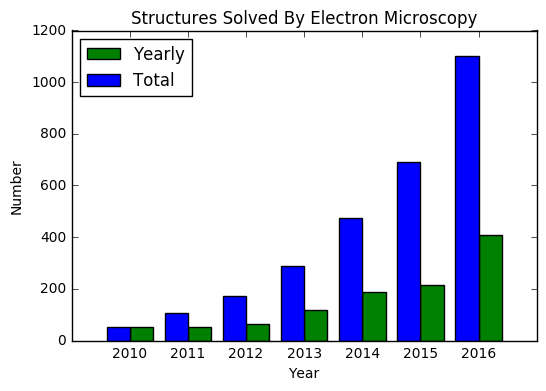

1.8865506649017334


In [62]:

start_time=time.time()
YearlyGrowthofStructuresSolvedByElectronMicroscopy(2010,2016)
# result=p.map(queryweb,range(2010,2017))
print(time.time()-start_time)

In [10]:
import xml.etree.ElementTree 
def queryresolution(result):
    resolutionlist=[]
    url = 'http://www.rcsb.org/pdb/rest/describePDB?structureId={}'.format(','.join(result.split('\n')).strip(','))
    req = urllib.request.Request(url)
    f = urllib.request.urlopen(req)
    result = f.read().decode("utf-8") 
    et=xml.etree.ElementTree.fromstring(result)
    for child in et:
        try:
            resolutionlist.append(child.attrib['resolution'])
        except:
            pass
    return resolutionlist

In [98]:
def YearlyGrowthofStructuresSolvedByElectronMicroscopyVsRes(start,end,low,high):
    p=Pool(4)
    result=p.map(querywebyear,range(start,end+1))
    res=np.asarray(p.map(calres,result),dtype=int).ravel()
    p.close()
    fig, ax = plt.subplots()
    ind = np.arange(end-start+1)
    years=len(ind)
    b1=ax.bar(ind-0.2, res[::3], color='red',align='center',width = 0.2)
    b2=ax.bar(ind, res[1::3], color='yellow',align='center',width = 0.2)
    b3=ax.bar(ind+0.2, res[2::3], color='blue',align='center',width = 0.2)
#     b4=ax.bar(ind+0.25, res[3::4], color='blue',align='center',width = 0.25)
    ax.set_xticklabels(np.arange(start,end+1))
    ax.set_xticks(ind)
# ax.ticklabel_format(useOffset=False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Numbers')
    ax.legend((b1[0],b2[0],b3[0]),('<{}A'.format(low),'{}~{}A'.format(low,high),'>{}A'.format(high)),loc=2)
    ax.set_title('Number of structures vs Resolution')
    plt.show()
def calres(i,low=4,high=6):
    c=np.asarray(queryresolution(i),dtype='float')
    return (c<low).sum(),((c>=low)&(c<high)).sum(),(c>=high).sum()

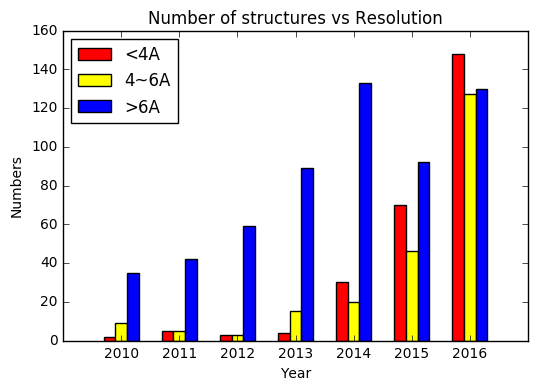

12.840273141860962


In [99]:
import time
start_time=time.time()
YearlyGrowthofStructuresSolvedByElectronMicroscopyVsRes(2010,2016,4,6)
print(time.time()-start_time)